<a href="https://colab.research.google.com/github/YoonieJang/CS484/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import statsmodels.api as stats
import sklearn.naive_bayes as naive_bayes
from sklearn import preprocessing, naive_bayes
from google.colab import files
import io
pd.options.display.max_columns = 1000

### Question 1

In [ ]:
import io
uploaded = files.upload()
purchase = pd.read_csv(io.BytesIO(uploaded['Purchase_Likelihood.csv']))
purchase = purchase.dropna()

Saving Purchase_Likelihood.csv to Purchase_Likelihood (1).csv


In [ ]:
#### a)
total=purchase.shape[0]
frequency = purchase.groupby('insurance').size()
freqtable = pd.DataFrame(columns=['Frequency', 'Probability'])
freqtable['Frequency']=frequency
freqtable['Probability']=frequency/total
print(freqtable)

           Frequency  Probability
insurance                        
0             143691     0.215996
1             426067     0.640462
2              95491     0.143542


In [ ]:
# Define a function to visualize the percent of a particular target category by a nominal predictor
def RowWithColumn (
   rowVar,          # Row variable
   columnVar,       # Column predictor
   show = 'ROW'):   # Show ROW fraction, COLUMN fraction, or BOTH table

   countTable = pd.crosstab(index = rowVar, columns = columnVar, margins = False, dropna = True)
   print("Frequency Table: \n", countTable)
   print( )

   if (show == 'ROW' or show == 'BOTH'):
       rowFraction = countTable.div(countTable.sum(1), axis='index')
       print("Row Fraction Table: \n", rowFraction)
       print( )

   if (show == 'COLUMN' or show == 'BOTH'):
       columnFraction = countTable.div(countTable.sum(0), axis='columns')
       print("Column Fraction Table: \n", columnFraction)
       print( )

   return

In [ ]:
#### b)
RowWithColumn(purchase['insurance'],purchase['group_size'],show='BOTH')

Frequency Table: 
 group_size       1      2     3    4
insurance                           
0           115460  25728  2282  221
1           329552  91065  5069  381
2            74293  19600  1505   93

Row Fraction Table: 
 group_size         1         2         3         4
insurance                                         
0           0.803530  0.179051  0.015881  0.001538
1           0.773475  0.213734  0.011897  0.000894
2           0.778010  0.205255  0.015761  0.000974

Column Fraction Table: 
 group_size         1         2         3         4
insurance                                         
0           0.222336  0.188631  0.257678  0.317986
1           0.634602  0.667666  0.572380  0.548201
2           0.143062  0.143702  0.169941  0.133813



In [ ]:
#### c)
RowWithColumn(purchase['insurance'],purchase['homeowner'],show='ROW')

Frequency Table: 
 homeowner       0       1
insurance                
0           78659   65032
1          183130  242937
2           46734   48757

Row Fraction Table: 
 homeowner         0         1
insurance                    
0          0.547418  0.452582
1          0.429815  0.570185
2          0.489407  0.510593



In [ ]:
#### d)
RowWithColumn(purchase['insurance'],purchase['married_couple'],show='ROW')

Frequency Table: 
 married_couple       0      1
insurance                    
0               117110  26581
1               333272  92795
2                75310  20181

Row Fraction Table: 
 married_couple         0         1
insurance                         
0               0.815013  0.184987
1               0.782206  0.217794
2               0.788661  0.211339



In [ ]:
# Define a function that performs the Pearson Chi-square test
#   xCat - Input categorical feature (array-like or Series)
#   yCat - Input categorical target field (array-like or Series)
import scipy.stats as sdist
import statsmodels.api as smodel

def ChiSquareTest (xCat, yCat):
    # Generate the crosstabulation
    obsCount = pd.crosstab(index = xCat, columns = yCat, margins = False, dropna = True)
    xNCat = obsCount.shape[0]
    yNCat = obsCount.shape[1]

    cTotal = obsCount.sum(axis = 1)
    rTotal = obsCount.sum(axis = 0)
    nTotal = np.sum(rTotal)
    expCount = np.outer(cTotal, (rTotal / nTotal))

    # Calculate the Chi-Square statistics
    chiSqStat = ((obsCount - expCount)**2 / expCount).to_numpy().sum()
    chiSqDf = (xNCat - 1.0) * (yNCat - 1.0)
    chiSqSig = sdist.chi2.sf(chiSqStat, chiSqDf)

    cramerV= chiSqStat/nTotal
    
    if (cTotal.size > rTotal.size):
      cramerV = cramerV/(rTotal.size - 1.0)
    else:
      cramerV = cramerV/(cTotal.size - 1.0)
       
    cramerV = np.sqrt(cramerV)

    return (xNCat, yNCat, chiSqStat, chiSqDf, chiSqSig, cramerV)

In [ ]:
#### e)
xNCat, yNCat, chiSqStat, chiSqDf, chiSqSig, cramerV = ChiSquareTest(purchase['group_size'],purchase['insurance'])
print(cramerV)

0.027102014055820786


In [ ]:
xNCat, yNCat, chiSqStat, chiSqDf, chiSqSig, cramerV = ChiSquareTest(purchase['homeowner'],purchase['insurance'])
print(cramerV)

0.09708641964781961


In [ ]:
xNCat, yNCat, chiSqStat, chiSqDf, chiSqSig, cramerV = ChiSquareTest(purchase['married_couple'],purchase['insurance'])
print(cramerV)

0.03242164583520746


In [ ]:
xTrain = purchase[['group_size','homeowner','married_couple']].astype('category')
yTrain = purchase[['insurance']].astype('category')

classifier = naive_bayes.MultinomialNB(alpha = 1.e-10)
thisFit = classifier.fit(xTrain, yTrain)

GroupSize = [1,2,3,4]
Homeowner = [0,1]
marriage = [0,1]
prediction = []
for g in GroupSize:
  for h in Homeowner:
    for m in marriage:
      prediction.append([g,h,m])

prediction= pd.DataFrame(prediction, columns=['groups_size','homeowner','married_couple'])
pridiction = prediction[['groups_size','homeowner','married_couple']].astype('category')
predProb = classifier.predict_proba(prediction)
probability = pd.DataFrame(predProb,columns=['Prob(insurance = 0)','Prob(insurance = 1)','Prob(insurance = 2)'])
print(pd.concat([prediction, probability],axis=1))

    groups_size  homeowner  married_couple  Prob(insurance = 0)  \
0             1          0               0             0.227037   
1             1          0               1             0.214391   
2             1          1               0             0.205588   
3             1          1               1             0.193842   
4             2          0               0             0.238441   
5             2          0               1             0.225342   
6             2          1               0             0.216281   
7             2          1               1             0.204079   
8             3          0               0             0.250201   
9             3          0               1             0.236653   
10            3          1               0             0.227342   
11            3          1               1             0.214684   
12            4          0               0             0.262308   
13            4          0               1             0.24831

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#### g)
probtable = pd.concat([prediction, probability],axis=1)
probtable['Prob(insurance = 1) / Prob(insurance = 2)']=probtable['Prob(insurance = 1)'] / probtable['Prob(insurance = 2)']
print(probtable)

    groups_size  homeowner  married_couple  Prob(insurance = 0)  \
0             1          0               0             0.227037   
1             1          0               1             0.214391   
2             1          1               0             0.205588   
3             1          1               1             0.193842   
4             2          0               0             0.238441   
5             2          0               1             0.225342   
6             2          1               0             0.216281   
7             2          1               1             0.204079   
8             3          0               0             0.250201   
9             3          0               1             0.236653   
10            3          1               0             0.227342   
11            3          1               1             0.214684   
12            4          0               0             0.262308   
13            4          0               1             0.24831

In [ ]:
max(probtable['Prob(insurance = 1) / Prob(insurance = 2)'])

4.662867606243949

### Question 2


In [ ]:
import sklearn.metrics as metrics
import sklearn.svm as svm
import matplotlib.pyplot as plt

In [ ]:
import io
uploaded = files.upload()
trainData = pd.read_csv(io.BytesIO(uploaded['SpiralWithCluster.csv']))
trainData = trainData.dropna()

Saving SpiralWithCluster.csv to SpiralWithCluster (2).csv


In [ ]:
xTrain = trainData[['x','y']]
yTrain = trainData['SpectralCluster']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20210325, max_iter = -1)
thisFit = svm_Model.fit(xTrain, yTrain) 
y_predictClass = thisFit.predict(xTrain)


In [ ]:
#### a)
print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)

Intercept =  [0.003345]
Coefficients =  [[0.05333512 0.32868383]]


In [ ]:
#### b)
print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))
trainData['_PredictedClass_'] = y_predictClass
print("Misclassification rate = ",1- metrics.accuracy_score(yTrain, y_predictClass) )

Mean Accuracy =  0.5
Misclassification rate =  0.5


In [ ]:
# get the separating hyperplane
xx = np.linspace(-5, 5)
w = svm_Model.coef_[0]
a = -w[0] / w[1]
yy = a * xx - (svm_Model.intercept_[0]) / w[1]

Text(0, 0.5, 'Y Co-ordinate')

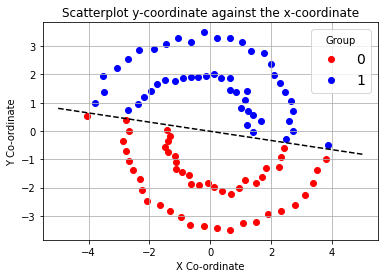

In [ ]:
#### c)
fig, ax = plt.subplots(1, 1)
ax.grid(b=True, which='major')

plt.plot(xx, yy, 'k--')

for i in range(2):
    subdata = trainData[trainData["_PredictedClass_"]==i]
    plt.scatter(subdata.x,subdata.y,label = (i),c = carray[i])
plt.legend(title = 'Group',loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.title("Scatterplot y-coordinate against the x-coordinate")
plt.xlabel("X Co-ordinate")
plt.ylabel("Y Co-ordinate")

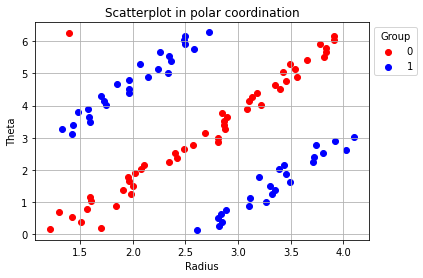

In [ ]:
#### d) Please express the data in polar coordinates.  
# Convert to the polar coordinates
df = pd.DataFrame(columns=['radius','theta'])
df['radius'] = np.sqrt(trainData['x']**2 + trainData['y']**2)
df['theta'] = np.arctan2(trainData['y'], trainData['x'])

def customArcTan (z):
    theta = np.where(z < 0.0, 2.0*np.pi+z, z)
    return (theta)

df['theta'] = df['theta'].apply(customArcTan)

# Build Support Vector Machine classifier
df['Class'] = trainData['SpectralCluster']
carray = ['red','blue']

for i in range(2):
    subdata = df[df["Class"]==i]
    plt.scatter(subdata.radius,subdata.theta,label = (i),c = carray[i])

plt.legend(title = 'Group',loc = 'best', bbox_to_anchor = (1, 1))
plt.title("Scatterplot in polar coordination")
plt.xlabel("Radius")
plt.ylabel("Theta")

plt.grid(True)
plt.show()

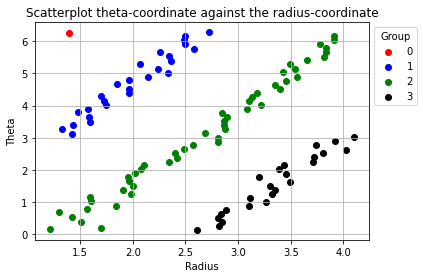

In [ ]:
#### e)
radius = df['radius']
theta = df['theta'].apply(customArcTan)
df_e = pd.DataFrame(columns=['Radius','Theta'])
df_e['Radius']=radius
df_e['Theta']=theta

group =[]
for i in range(len(radius)):
    if radius[i] < 1.5 and theta[i]>6.0:
      group.append(0)

    elif radius[i] < 2.5 and theta[i]>3:
      group.append(1)

    elif 2.5<radius[i] < 2.75 and theta[i]>5:
      group.append(1)

    elif 2.5< radius[i] < 3 and 2< theta[i]<4:
      group.append(2)

    elif 2.5< radius[i]  and theta[i]<3.1:
      group.append(3)   

    elif radius[i] < 4.0:
      group.append(2)
         

carray4 = ['red','blue', 'green', 'black']
df_e['Class']=group

for i in range(4):
    subdata = df_e[df_e["Class"]==i]
    plt.scatter(x=subdata.Radius, y=subdata.Theta,label = (i),c = carray4[i])
plt.grid(True)
plt.legend(title = 'Group',loc = 'best', bbox_to_anchor = (1, 1))
plt.title("Scatterplot theta-coordinate against the radius-coordinate")
plt.xlabel("Radius")
plt.ylabel("Theta")
plt.show()

Hyperplane formulas
SVM 0: 1.4691250777389275  + ( 0.933784147085173 ) X +( -0.45380248720594835 ) Y = 0
SVM 1: -0.8768942577875997  + ( 1.8920953263166829 ) X +( -0.8961324867551237 ) Y = 0
SVM 2: -4.132844878075682  + ( 2.012583547086879 ) X +( -0.8375616435865432 ) Y = 0




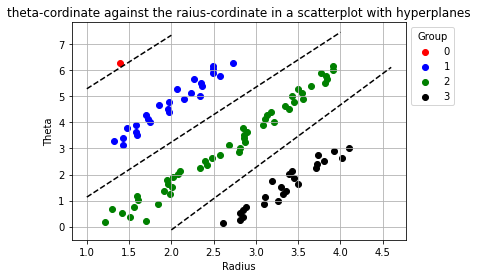

In [ ]:
#### f)
# SVM 0: Group 0 versus Group 1
svm_0 = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20210325, max_iter = -1)
x = df_e[df_e['Class'] == 0]
x = x.append(df_e[df_e['Class']==1])
df_f = x[['Radius','Theta']]
svm_0.fit(df_f,x.Class)

# get the separating hyperplane
xx = np.linspace(1,2)
w = svm_0.coef_[0]
a = -w[0] / w[1]
yy = a * xx - (svm_0.intercept_[0]) / w[1]

#hyperplanes.
print("Hyperplane formulas")
print ("SVM 0:" , svm_0.intercept_[0], " + (", w[0], ") X +(" ,w[1],") Y = 0")

h0_xx = xx * np.cos(yy[:])
h0_yy = xx * np.sin(yy[:])

plt.plot(xx, yy, 'k--')

# SVM 1: Group 1 versus Group 2
svm_0 = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20210325, max_iter = -1)
x = df_e[df_e['Class'] == 1]
x = x.append(df_e[df_e['Class']==2])
df_f = x[['Radius','Theta']]
svm_0.fit(df_f,x.Class)

# get the separating hyperplane
xx = np.linspace(1,4)
w = svm_0.coef_[0]
a = -w[0] / w[1]
yy = a * xx - (svm_0.intercept_[0]) / w[1]

#hyperplanes.
print ("SVM 1:" , svm_0.intercept_[0], " + (", w[0], ") X +(" ,w[1],") Y = 0")

h1_xx = xx * np.cos(yy[:])
h1_yy = xx * np.sin(yy[:])

plt.plot(xx, yy, 'k--')

# SVM 2: Group 2 versus Group 3
svm_0 = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20210325, max_iter = -1)
x = df_e[df_e['Class'] == 2]
x = x.append(df_e[df_e['Class']==3])
df_f = x[['Radius','Theta']]
svm_0.fit(df_f,x.Class)

# get the separating hyperplane
xx = np.linspace(2,4.6)
w = svm_0.coef_[0]
a = -w[0] / w[1]
yy = a * xx - (svm_0.intercept_[0]) / w[1]

#hyperplanes.
print ("SVM 2:" , svm_0.intercept_[0], " + (", w[0], ") X +(" ,w[1],") Y = 0")

h2_xx = xx * np.cos(yy[:])
h2_yy = xx * np.sin(yy[:])

plt.plot(xx, yy, 'k--')
print("\n")
for i in range(4):
    subdata = df_e[df_e["Class"]==i]
    plt.scatter(x=subdata.Radius, y=subdata.Theta,label = (i),c = carray4[i])
plt.grid(True)
plt.legend(title = 'Group',loc = 'best', bbox_to_anchor = (1, 1))
plt.title("theta-cordinate against the raius-cordinate in a scatterplot with hyperplanes")
plt.xlabel("Radius")
plt.ylabel("Theta")
plt.show()

<Figure size 720x720 with 0 Axes>

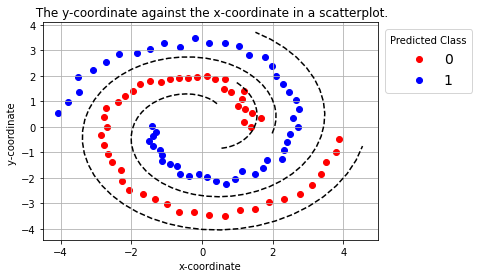

In [ ]:
#### g) 
#plot the theta-coordinate against the radius-coordinate in a scatterplot
carray = ['red', 'blue']
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(1, 1)
ax.grid(b=True, which='major')

for i in range(2):
    subData = trainData[trainData['SpectralCluster'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = (i))
    
plt.plot(h0_xx, h0_yy, color = 'black', linestyle = '--')
plt.plot(h1_xx, h1_yy, color = 'black', linestyle = '--')
plt.plot(h2_xx, h2_yy, color = 'black', linestyle = '--')
plt.grid(True)
plt.title(' The y-coordinate against the x-coordinate in a scatterplot.')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate ')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()
